In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)

In [3]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

In [4]:
from sklearn import set_config
set_config(print_changed_only=False)

# IMPORTING DATA

In [5]:
pricepred = pd.read_csv('fixprice.csv',index_col=1)

In [6]:
pricepred.head()

,Unnamed: 0,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,host_is_superhost,property_type,bedrooms,beds,guests_included,review_scores_rating,instant_bookable,bathrooms,security_deposit,cleaning_fee,len_amenities
id,,,,,,,,,,,,,,,,,,,,,,,,,,
49091,0,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,84,180,1,0.01,2,365,f,Apartment,1.0,1.0,1,94.0,f,1.0,0.0,0.0,8
50646,1,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,80,90,18,0.24,1,365,f,Apartment,1.0,1.0,2,91.0,f,1.0,0.0,0.0,12
56334,2,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,70,6,20,0.18,2,365,f,Apartment,1.0,1.0,1,98.0,f,1.0,0.0,0.0,9
71609,3,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,167,90,20,0.19,8,365,f,Villa,2.0,3.0,4,89.0,t,1.0,279.0,56.0,27
71896,4,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,95,90,24,0.22,8,365,f,House,1.0,1.0,1,83.0,t,0.5,139.0,28.0,24


In [7]:
pricepred.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
pricepred.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,bedrooms,beds,guests_included,review_scores_rating,bathrooms,security_deposit,cleaning_fee,len_amenities
count,6.954000e+03,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000
mean,1.045947e+08,1.314706,103.847462,129.803135,20.448806,12.718723,0.472921,44.466926,193.476416,1.254817,1.895743,1.798821,54.513230,1.505896,155.063561,27.054501,20.788898
std,9.557451e+07,0.031183,0.043527,80.305075,40.369565,32.043364,1.116076,76.498831,159.249611,0.766258,2.429427,1.337354,45.353699,1.145892,412.253574,37.893016,9.079020
min,2.366600e+04,1.245260,103.665470,14.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.500662e+07,1.296385,103.837922,60.000000,2.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,14.000000
50%,6.640618e+07,1.311340,103.849975,119.000000,4.000000,1.000000,0.090000,10.000000,181.000000,1.000000,1.000000,1.000000,80.000000,1.000000,0.000000,20.000000,20.000000
75%,1.703783e+08,1.323213,103.865775,176.000000,18.000000,8.000000,0.430000,52.000000,363.000000,1.000000,2.000000,2.000000,96.000000,2.000000,200.000000,40.000000,28.000000
max,3.500839e+08,1.454590,103.971710,380.000000,365.000000,370.000000,28.720000,335.000000,365.000000,8.000000,58.000000,16.000000,100.000000,21.000000,6500.000000,900.000000,55.000000


Memastikan sekali lagi data tidak ada yang NaN, missing values.

In [9]:
pricepred.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'host_is_superhost', 'property_type', 'bedrooms', 'beds',
       'guests_included', 'review_scores_rating', 'instant_bookable',
       'bathrooms', 'security_deposit', 'cleaning_fee', 'len_amenities'],
      dtype='object')

In [533]:
pricepred['neighbourhood'].nunique()

41

In [244]:
# pricepred.drop(columns= ['name','host_id','host_name'],inplace=True)

In [ ]:
# pricepred.drop(columns= ['name','host_id','host_name','longitude','latitude'],inplace=True)

In [10]:
pricepred.drop(columns= ['name','host_id','host_name','longitude','latitude','neighbourhood'],inplace=True)

In [11]:
pricepred.columns

Index(['neighbourhood_group', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'host_is_superhost', 'property_type', 'bedrooms', 'beds',
       'guests_included', 'review_scores_rating', 'instant_bookable',
       'bathrooms', 'security_deposit', 'cleaning_fee', 'len_amenities'],
      dtype='object')

In [536]:
pricepred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6954 entries, 49091 to 43880119
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             6954 non-null   object 
 1   room_type                       6954 non-null   object 
 2   price                           6954 non-null   int64  
 3   minimum_nights                  6954 non-null   int64  
 4   number_of_reviews               6954 non-null   int64  
 5   reviews_per_month               6954 non-null   float64
 6   calculated_host_listings_count  6954 non-null   int64  
 7   availability_365                6954 non-null   int64  
 8   host_is_superhost               6954 non-null   object 
 9   property_type                   6954 non-null   object 
 10  bedrooms                        6954 non-null   float64
 11  beds                            6954 non-null   float64
 12  guests_included           

In [12]:
pricepred['bedrooms']=pricepred['bedrooms'].astype(int)
pricepred['beds']=pricepred['beds'].astype(int)
pricepred['bathrooms']=pricepred['bathrooms'].astype(int)

In [538]:
pricepred.describe().T

,count,mean,std,min,25%,50%,75%,max
price,6954.0,129.803135,80.305075,14.0,60.0,119.00,176.00,380.00
minimum_nights,6954.0,20.448806,40.369565,1.0,2.0,4.00,18.00,365.00
number_of_reviews,6954.0,12.718723,32.043364,0.0,0.0,1.00,8.00,370.00
reviews_per_month,6954.0,0.472921,1.116076,0.0,0.0,0.09,0.43,28.72
calculated_host_listings_count,6954.0,44.466926,76.498831,1.0,2.0,10.00,52.00,335.00
availability_365,6954.0,193.476416,159.249611,0.0,1.0,181.00,363.00,365.00
bedrooms,6954.0,1.254817,0.766258,0.0,1.0,1.00,1.00,8.00
beds,6954.0,1.895743,2.429427,0.0,1.0,1.00,2.00,58.00
guests_included,6954.0,1.798821,1.337354,1.0,1.0,1.00,2.00,16.00
review_scores_rating,6954.0,54.513230,45.353699,0.0,0.0,80.00,96.00,100.00


# Correlation

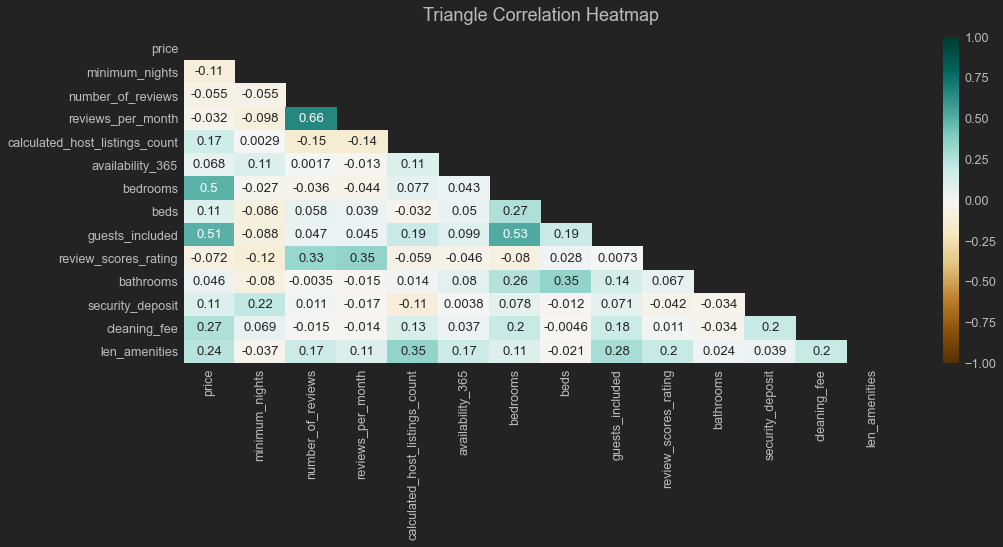

In [13]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(pricepred.corr(), dtype=np.bool))
heatmap = sns.heatmap(pricepred.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

# DATA MANIPULATION 

In [19]:
# import category_encoders as ce

In [59]:
df_dummy = pricepred.copy()

In [60]:
# dataset_new= pricepred.copy()

## PROPERTY TYPE

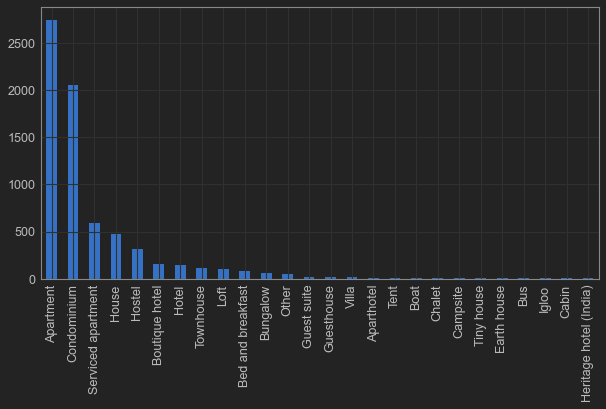

In [61]:
plt.figure(figsize=(10,5))
df_dummy["property_type"].value_counts().plot(kind="bar")

In [62]:
df_dummy['property_type'].nunique()

26

menggabungkan house, townhouse, tinyhouse, guesthouse, earth house sebagai house

In [63]:
df_dummy["property_type"] = df_dummy["property_type"].apply(lambda x: "House" if x=="Townhouse" or x=="Tiny house" or x=="Guesthouse" or x=="Earth house" or x=="Loft" or x=="Bungalow" else x)

In [64]:
df_dummy["property_type"] = df_dummy["property_type"].apply(lambda x: "Apartment" if x=="Serviced apartment" or x=="Aparthotel" else x)

In [65]:
df_dummy["property_type"] = df_dummy["property_type"].apply(lambda x: "Hotel" if x== "Bed and breakfast" else x)

In [66]:
df_dummy["property_type"] = df_dummy["property_type"].apply(lambda x: "Condominium" if x== "Guest suite" else x)

In [67]:
to_other = []
for x in df_dummy["property_type"].unique():
    if sum(df_dummy["property_type"] == x) < sum(df_dummy["property_type"] == "Other"):
        to_other.append(x)
to_other

['Villa',
 'Chalet',
 'Boat',
 'Cabin',
 'Tent',
 'Campsite',
 'Bus',
 'Heritage hotel (India)',
 'Igloo']

In [68]:
df_dummy["property_type"] = df_dummy["property_type"].apply(lambda x: "Other" if x in to_other else x)

In [69]:
df_dummy['property_type'].nunique()

7

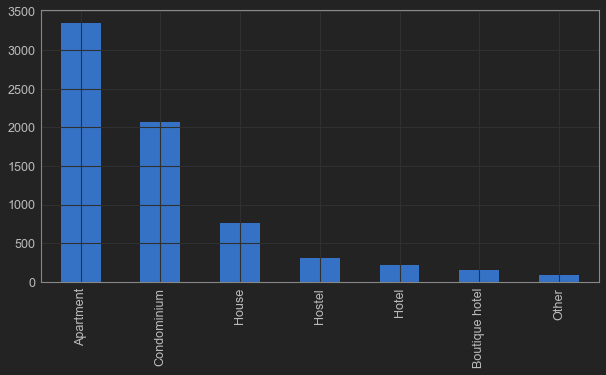

In [70]:
plt.figure(figsize=(10,5))
df_dummy["property_type"].value_counts().plot(kind="bar")

## Neighbourhood

In [71]:
import category_encoders as ce

In [72]:
from sklearn.preprocessing import OneHotEncoder

In [201]:
# # creating instance of one-hot-encoder
# enc = OneHotEncoder()
# # passing bridge-types-cat column (label encoded values of bridge_types)



In [99]:
# from sklearn.preprocessing import LabelEncoder

In [203]:
# cols = binary = ce.OneHotEncoder(cols=['neighbourhood_group', 'neighbourhood', 'room_type',
#                                        'host_is_superhost', 'property_type', 'instant_bookable'])
# df_dummy = binary.fit_transform(df_dummy)
# #

In [254]:
# df_dummy = pd.get_dummies(data=df_dummy, columns=['neighbourhood_group', 'room_type',
#                                                   'host_is_superhost', 'property_type', 'instant_bookable',
#                                                   ])

In [73]:
df_dummy.head(2)

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,host_is_superhost,property_type,bedrooms,beds,guests_included,review_scores_rating,instant_bookable,bathrooms,security_deposit,cleaning_fee,len_amenities
id,,,,,,,,,,,,,,,,,,,
49091,North Region,Private room,84,180,1,0.01,2,365,f,Apartment,1,1,1,94.0,f,1,0.0,0.0,8
50646,Central Region,Private room,80,90,18,0.24,1,365,f,Apartment,1,1,2,91.0,f,1,0.0,0.0,12


## Set Dummies (for Categorical)

In [114]:
# df_dummy = pd.get_dummies(data=pricepred, columns=['neighbourhood_group', 'neighbourhood', 'room_type',
#                                                                     'host_is_superhost', 'property_type', 'instant_bookable',
#                                                                     ])

In [74]:
df_dummy = pd.get_dummies(data=df_dummy, columns=['neighbourhood_group',  'room_type',
                                                   'host_is_superhost', 'property_type', 'instant_bookable',
                                                   ])

In [75]:
df_dummy.head(1)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,bedrooms,beds,guests_included,review_scores_rating,bathrooms,security_deposit,cleaning_fee,len_amenities,neighbourhood_group_Central Region,neighbourhood_group_East Region,neighbourhood_group_North Region,neighbourhood_group_North-East Region,neighbourhood_group_West Region,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_f,host_is_superhost_t,property_type_Apartment,property_type_Boutique hotel,property_type_Condominium,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Other,instant_bookable_f,instant_bookable_t
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49091,84,180,1,0.01,2,365,1,1,1,94.0,1,0.0,0.0,8,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0


In [24]:
# df_dummy = pd.get_dummies(data=df_dummy, columns=['neighbourhood_group', 'room_type',
#                                                   'host_is_superhost', 'property_type', 'instant_bookable',
#                                                   ])

In [76]:
df_dummy.shape

(6954, 34)

In [548]:
df_dummy.head(2)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,bedrooms,beds,guests_included,review_scores_rating,bathrooms,security_deposit,cleaning_fee,len_amenities,neighbourhood_group_Central Region,neighbourhood_group_East Region,neighbourhood_group_North Region,neighbourhood_group_North-East Region,neighbourhood_group_West Region,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_f,host_is_superhost_t,property_type_Aparthotel,property_type_Apartment,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Bus,property_type_Cabin,property_type_Campsite,property_type_Chalet,property_type_Condominium,property_type_Earth house,property_type_Guest suite,property_type_Guesthouse,property_type_Heritage hotel (India),property_type_Hostel,property_type_Hotel,property_type_House,property_type_Igloo,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Tent,property_type_Tiny house,property_type_Townhouse,property_type_Villa,instant_bookable_f,instant_bookable_t
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49091,84,180,1,0.01,2,365,1,1,1,94.0,1,0.0,0.0,8,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
50646,80,90,18,0.24,1,365,1,1,2,91.0,1,0.0,0.0,12,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## Transforming To Logarithmic Scale

Saya akan transform numerical yang continous ke log scale karena seperti yang dilihat pada file EDA, data tersebut tidak terdistribusi normal

In [30]:
## POWER TRANSFORM

In [31]:
# pricepower = df_dummy.copy()

In [32]:
# pricelogn = df_dummy.copy()

In [77]:
pricelog1p = df_dummy.copy()

In [78]:
pricelog1p['price'] = np.log1p(pricelog1p['price'])

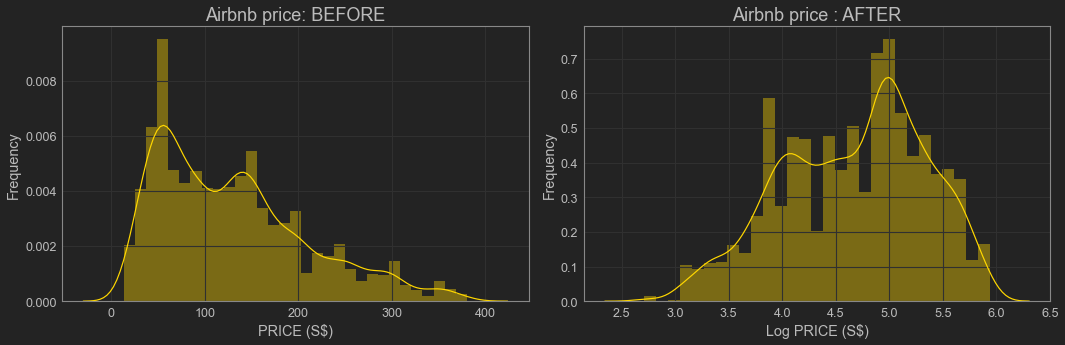

In [79]:
figure, axes = plt.subplots(1, 2,figsize=(15,5))

a = sns.distplot(df_dummy['price'],ax=axes[0],color='gold')
a.set(xlabel='PRICE (S$)', ylabel='Frequency')
a.set_title("Airbnb price: BEFORE",fontsize= 18)

b= sns.distplot(pricelog1p['price'],ax=axes[1],color='gold')
b.set(xlabel='Log PRICE (S$)', ylabel='Frequency')
b.set_title("Airbnb price : AFTER",fontsize= 18)

plt.tight_layout()

In [80]:
pricelog1p.columns

Index(['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'bedrooms',
       'beds', 'guests_included', 'review_scores_rating', 'bathrooms',
       'security_deposit', 'cleaning_fee', 'len_amenities',
       'neighbourhood_group_Central Region', 'neighbourhood_group_East Region',
       'neighbourhood_group_North Region',
       'neighbourhood_group_North-East Region',
       'neighbourhood_group_West Region', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'host_is_superhost_f', 'host_is_superhost_t',
       'property_type_Apartment', 'property_type_Boutique hotel',
       'property_type_Condominium', 'property_type_Hostel',
       'property_type_Hotel', 'property_type_House', 'property_type_Other',
       'instant_bookable_f', 'instant_bookable_t'],
      dtype='object')

In [81]:
pricelog1p['minimum_nights']=pricelog1p['minimum_nights'].apply(lambda x:np.log1p(x))
# pricelog1p['latitude']=pricelog1p['latitude'].apply(lambda x:np.log1p(x))
# pricelog1p['longitude']=pricelog1p['longitude'].apply(lambda x:np.log1p(x))
pricelog1p['number_of_reviews']=pricelog1p['number_of_reviews'].apply(lambda x:np.log1p(x))
pricelog1p['reviews_per_month']=pricelog1p['reviews_per_month'].apply(lambda x:np.log1p(x))
pricelog1p['calculated_host_listings_count']=pricelog1p['calculated_host_listings_count'].apply(lambda x:np.log1p(x))
pricelog1p['availability_365']=pricelog1p['availability_365'].apply(lambda x:np.log1p(x))#perhatian
pricelog1p['bedrooms']=pricelog1p['bedrooms'].apply(lambda x:np.log1p(x))
pricelog1p['beds']=pricelog1p['beds'].apply(lambda x:np.log1p(x))
pricelog1p['guests_included']=pricelog1p['guests_included'].apply(lambda x:np.log1p(x))
pricelog1p['review_scores_rating']=pricelog1p['review_scores_rating'].apply(lambda x:np.log1p(x))
pricelog1p['bathrooms']=pricelog1p['bathrooms'].apply(lambda x:np.log1p(x))
pricelog1p['security_deposit']=pricelog1p['security_deposit'].apply(lambda x:np.log1p(x))
pricelog1p['cleaning_fee']=pricelog1p['cleaning_fee'].apply(lambda x:np.log1p(x))
pricelog1p['len_amenities']=pricelog1p['len_amenities'].apply(lambda x:np.log1p(x))

In [278]:
pricelog1p.describe().T

,count,mean,std,min,25%,50%,75%,max
price,6954.0,4.669340,0.668987,2.708050,4.110874,4.787492,5.176150,5.942799
number_of_reviews,6954.0,1.306556,1.448368,0.000000,0.000000,0.693147,2.197225,5.916202
calculated_host_listings_count,6954.0,2.587740,1.624588,0.693147,1.098612,2.397895,3.970292,5.817111
bedrooms,6954.0,0.760404,0.324752,0.000000,0.693147,0.693147,0.693147,2.197225
beds,6954.0,0.931227,0.443082,0.000000,0.693147,0.693147,1.098612,4.077537
guests_included,6954.0,0.948694,0.370857,0.693147,0.693147,0.693147,1.098612,2.833213
review_scores_rating,6954.0,2.710947,2.209053,0.000000,0.000000,4.394449,4.574711,4.615121
bathrooms,6954.0,0.839249,0.321662,0.000000,0.693147,0.693147,1.098612,3.091042
security_deposit,6954.0,2.252150,2.787584,0.000000,0.000000,0.000000,5.303305,8.779711
cleaning_fee,6954.0,2.200622,1.815707,0.000000,0.000000,3.044522,3.713572,6.803505


# Filtering Data

In [82]:
pricepredict = pricelog1p.copy()

In [83]:
pricepredict.head(1)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,bedrooms,beds,guests_included,review_scores_rating,bathrooms,security_deposit,cleaning_fee,len_amenities,neighbourhood_group_Central Region,neighbourhood_group_East Region,neighbourhood_group_North Region,neighbourhood_group_North-East Region,neighbourhood_group_West Region,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_f,host_is_superhost_t,property_type_Apartment,property_type_Boutique hotel,property_type_Condominium,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Other,instant_bookable_f,instant_bookable_t
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49091,4.442651,5.198497,0.693147,0.00995,1.098612,5.902633,0.693147,0.693147,0.693147,4.553877,0.693147,0.0,0.0,2.197225,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0


saya akan mendrop salah satu dari kolom number_of_review atau review_per_month karena korelasi antar keduanya tinggi. Terdeteksi sebagai multicollinearity

In [84]:
pricepredict.drop(columns = 'number_of_reviews',inplace= True)

In [330]:
# pricepredict.drop(columns = 'neighbourhood',inplace= True)

In [85]:
pricepredict.shape

(6954, 33)

In [332]:
# pricepredict.to_csv("pricepredicttest.csv")

# Base Model Predict

In [86]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [87]:
y = pricepredict['price']
X = pricepredict.drop(['price'],axis = 1)

In [335]:
# target_price=pricepredict['price']
# data_price=pricepredict.drop(['price'],axis=1)

In [88]:
X.head()

,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,bedrooms,beds,guests_included,review_scores_rating,bathrooms,security_deposit,cleaning_fee,len_amenities,neighbourhood_group_Central Region,neighbourhood_group_East Region,neighbourhood_group_North Region,neighbourhood_group_North-East Region,neighbourhood_group_West Region,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_f,host_is_superhost_t,property_type_Apartment,property_type_Boutique hotel,property_type_Condominium,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Other,instant_bookable_f,instant_bookable_t
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49091,5.198497,0.009950,1.098612,5.902633,0.693147,0.693147,0.693147,4.553877,0.693147,0.000000,0.000000,2.197225,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0
50646,4.510860,0.215111,0.693147,5.902633,0.693147,0.693147,1.098612,4.521789,0.693147,0.000000,0.000000,2.564949,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0
56334,1.945910,0.165514,1.098612,5.902633,0.693147,0.693147,0.693147,4.595120,0.693147,0.000000,0.000000,2.302585,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0
71609,4.510860,0.173953,2.197225,5.902633,1.098612,1.386294,1.609438,4.499810,0.693147,5.634790,4.043051,3.332205,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1
71896,4.510860,0.198851,2.197225,5.902633,0.693147,0.693147,0.693147,4.430817,0.000000,4.941642,3.367296,3.218876,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1


## CROSS VALIDATION

In [89]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split

In [149]:
# scorer = make_scorer(mean_squared_error, greater_is_better = False)

# def rmse_cv_train(model):
#     rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 5))
#     return(rmse)

# def rmse_cv_test(model):
#     rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 5))
#     return(rmse)

## Splitting

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state=42)

In [567]:
# X_train, X_test, y_train, y_test = train_test_split(data_price, target_price, test_size=0.2,random_state=42)

In [92]:
X_train.shape, X_test.shape

((5563, 32), (1391, 32))

## Linear Model

In [93]:
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler

In [94]:
from sklearn.linear_model import LinearRegression, RidgeCV

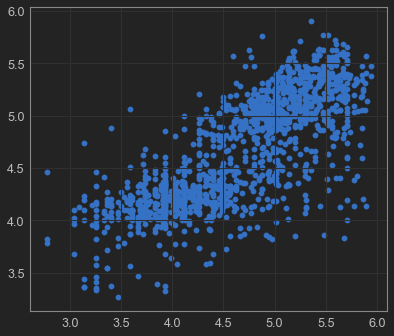

In [95]:
linear = LinearRegression()
linear.fit (X_train,y_train)
price_pred = linear.predict(X_test)
plt.scatter(y_test,price_pred)

In [96]:
MAE_lr = mean_absolute_error(y_test, price_pred)
MSE_lr = mean_squared_error(y_test, price_pred)
RMSE_lr = np.sqrt(MSE_lr)
R2_lr = r2_score(y_test, price_pred)
print(f"Training: {linear.score(X_train,y_train)}")
print(f"Testing: {R2_lr}")

Training: 0.590245650484894
Testing: 0.5804517415519684


In [97]:
lrdata = pd.DataFrame({'Actual':y_test, 'Prediction': price_pred})
lrdata.head(5)

,Actual,Prediction
id,,
39612331,5.476464,5.007130
39612598,3.688879,4.182228
19799435,3.931826,4.376445
823571,5.634790,4.407371
19286135,4.912655,5.053792


In [574]:
# print("RMSE on Training set :", rmse_cv_train(linear).mean())
# print("RMSE on Test set :", rmse_cv_test(linear).mean())

In [575]:
# perform.append(['linear_1', rmse_cv_train(linear).mean(), rmse_cv_test(linear).mean()])

In [576]:
# ScorePerform.append(['Linear_1', metrics.r2_score(y_test,predictions), ])


### RESIDUAL PLOT

In [98]:
residual = np.expm1(y_test) - np.expm1(price_pred)

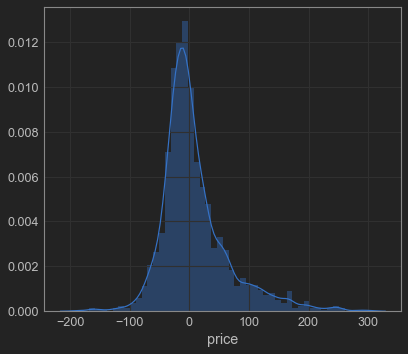

In [99]:
# residual = price_pred - y_test
sns.distplot(residual)

In [370]:
#### COBA YELLOWBRICK

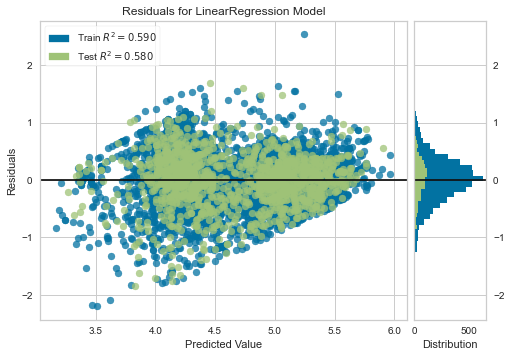

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

# Load a regression dataset
train, target = load_concrete()


# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(linear)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

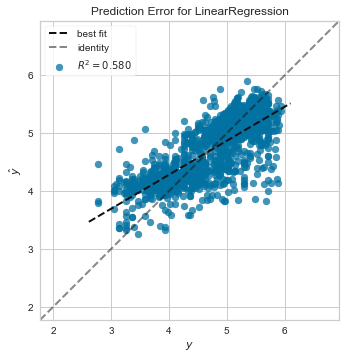

In [101]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
visualizer = PredictionError(linear)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()    

## Ridge Linear Regression

In [102]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 5)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

# print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
# print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
predict_train_ridge = ridge.predict(X_train)
predict_test_ridge = ridge.predict(X_test)

Best alpha : 3.0
Try again for more precision with alphas centered around 3.0
Best alpha : 3.0


In [103]:
MAE_ridge = mean_absolute_error(y_test, predict_test_ridge)
MSE_ridge = mean_squared_error(y_test, predict_test_ridge)
RMSE_ridge = np.sqrt(MSE_ridge)
R2_ridge = r2_score(y_test, predict_test_ridge)
print(f"Training: {ridge.score(X_train,y_train)}")
print(f"Testing: {R2_ridge}")

Training: 0.5902251859181807
Testing: 0.5804203091305771


In [582]:
# print('MAE:', mean_absolute_error(y_test, predict_test_ridge))
# print('MSE:', mean_squared_error(y_test, predict_test_ridge))
# print('RMSE:', np.sqrt(mean_squared_error(y_test, predict_test_ridge)))
# print('R2:', r2_score(y_test, predict_test_ridge))

In [104]:
lrdata = pd.DataFrame({'Actual':y_test, 'Prediction': predict_test_ridge})
lrdata.head(5)

,Actual,Prediction
id,,
39612331,5.476464,5.008364
39612598,3.688879,4.183665
19799435,3.931826,4.376836
823571,5.634790,4.406607
19286135,4.912655,5.054955


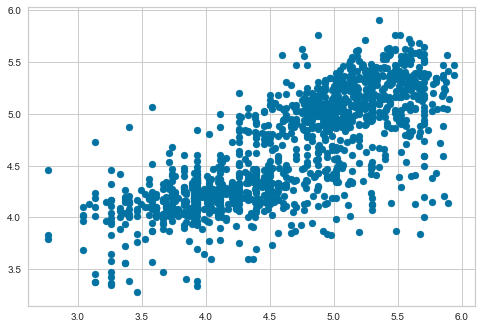

In [105]:
plt.scatter(y_test,predict_test_ridge)

Ridge picked 32 features and eliminated the other 0 features


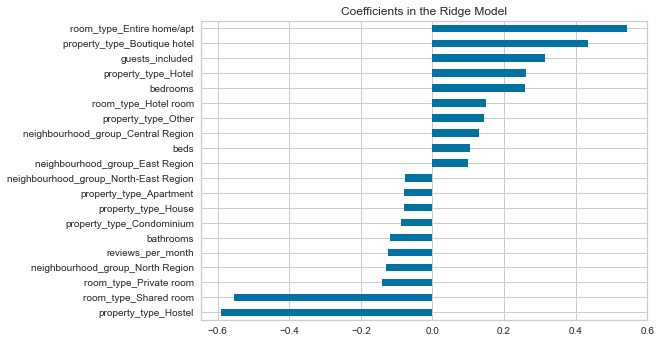

In [106]:
# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

In [73]:
# perform.append(['Ridge_1', rmse_cv_train(ridge).mean(), rmse_cv_test(ridge).mean()])

### RESIDUAL PLOT

In [107]:
ridgeresidual = np.expm1(y_test) - np.expm1(predict_test_ridge)

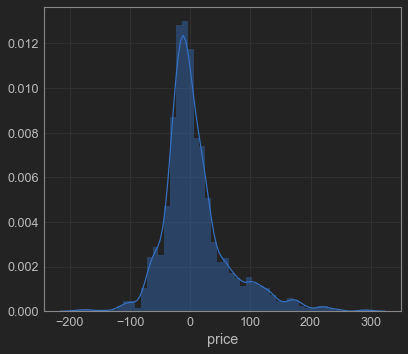

In [587]:
sns.distplot(ridgeresidual)

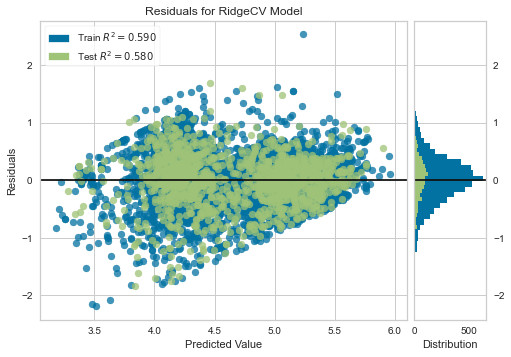

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

# Load a regression dataset
train, target = load_concrete()


# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

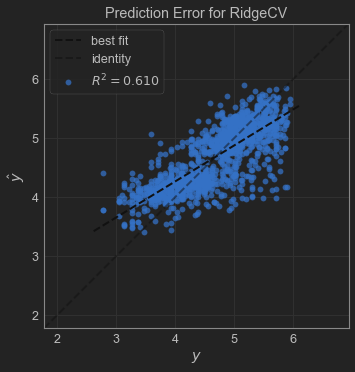

In [589]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
visualizer = PredictionError(ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()    

## RANDOM FOREST REGRESSOR

In [115]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [116]:
prediction_rf = rf.predict(X_test)

In [117]:
MAE_rf = mean_absolute_error(y_test, prediction_rf)
MSE_rf = mean_squared_error(y_test, prediction_rf)
RMSE_rf = np.sqrt(MSE_rf)
R2_rf = r2_score(y_test, prediction_rf)
print(f"Training: {rf.score(X_train,y_train)}")
print(f"Testing: {R2_rf}")

Training: 0.967947216700928
Testing: 0.7796394883238544


In [118]:
# print("RMSE on Training set :", rmse_cv_train(rf).mean())
# print("RMSE on Test set :", rmse_cv_test(rf).mean())

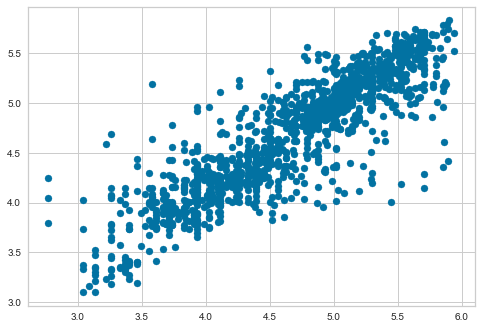

In [119]:
plt.scatter(y_test, prediction_rf)

In [120]:
lrdata = pd.DataFrame({'Actual':y_test, 'Prediction': prediction_rf})
lrdata.head(5)

,Actual,Prediction
id,,
39612331,5.476464,4.982378
39612598,3.688879,3.906966
19799435,3.931826,4.238438
823571,5.634790,5.146202
19286135,4.912655,5.018462


In [85]:
# perform.append(['randomforest_1', rmse_cv_train(rf).mean(), rmse_cv_test(rf).mean()])

### RESIDUAL PLOT

In [121]:
RFresidual = np.expm1(y_test) - np.expm1(prediction_rf)

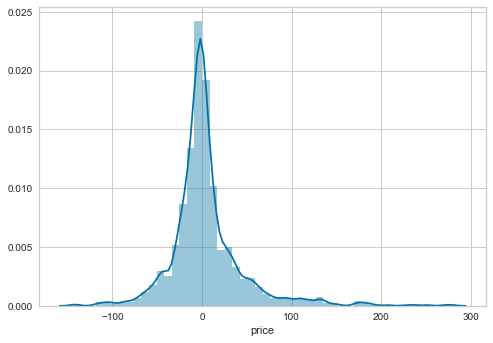

In [122]:
# RFresidual = prediction_rf - y_test
sns.distplot(RFresidual)

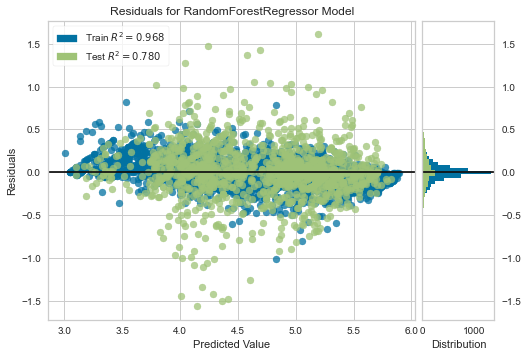

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

# Load a regression dataset
train, target = load_concrete()


# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(rf)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

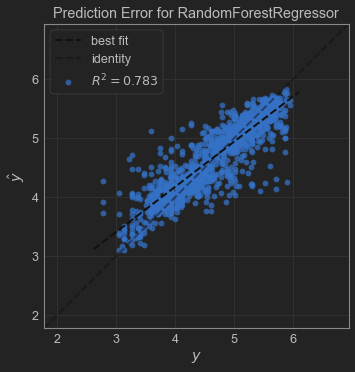

In [598]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
visualizer = PredictionError(rf)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()    

## XGB REGRESSOR 

In [124]:
from xgboost import XGBRegressor

In [125]:
xgboost = XGBRegressor()#(learning_rate=0.01, n_estimators=1000, max_depth=4)

In [126]:
xgboost.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [127]:
prediction_XGB = xgboost.predict(X_test)

In [128]:
MAE_xgboost = mean_absolute_error(y_test, prediction_XGB)
MSE_xgboost = mean_squared_error(y_test, prediction_XGB)
RMSE_xgboost = np.sqrt(MSE_xgboost)
R2_xgboost = r2_score(y_test, prediction_XGB)
print(f"Training: {xgboost.score(X_train,y_train)}")
print(f"Testing: {R2_xgboost}")

Training: 0.9309181335369094
Testing: 0.7680484319420836


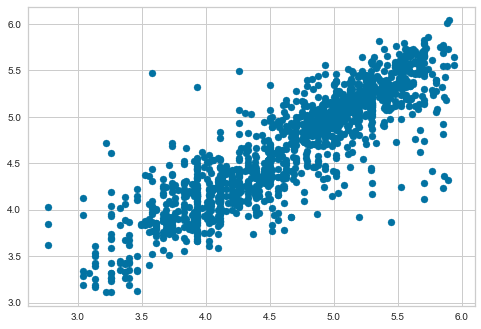

In [129]:
plt.scatter(y_test, prediction_XGB)

In [130]:
# print("RMSE on Training set :", rmse_cv_train(xgboost).mean())
# print("RMSE on Test set :", rmse_cv_test(xgboost).mean())

In [131]:
# perform.append(['xgboost_1', rmse_cv_train(xgboost).mean(), rmse_cv_test(xgboost).mean()])

In [132]:
lrdata = pd.DataFrame({'Actual':y_test, 'Prediction': prediction_XGB})
lrdata.head(5)

,Actual,Prediction
id,,
39612331,5.476464,5.258893
39612598,3.688879,3.840634
19799435,3.931826,4.464837
823571,5.634790,5.229458
19286135,4.912655,4.949417


### RESIDUAL PLOT

In [133]:
xgbresidual = np.expm1(y_test) - np.expm1(prediction_XGB)

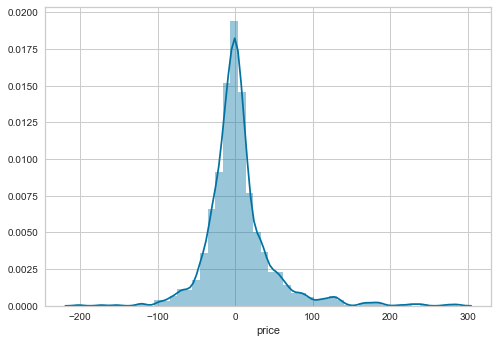

In [134]:
# xgbresidual = prediction_XGB - y_test
sns.distplot(xgbresidual)

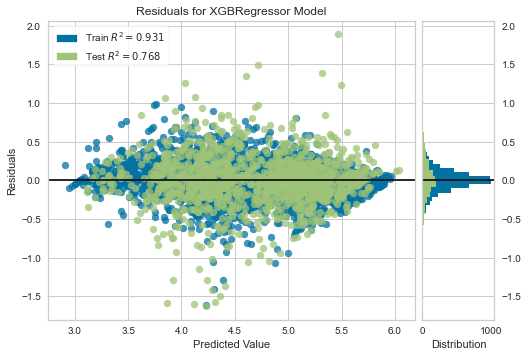

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

# Load a regression dataset
train, target = load_concrete()


# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(xgboost)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

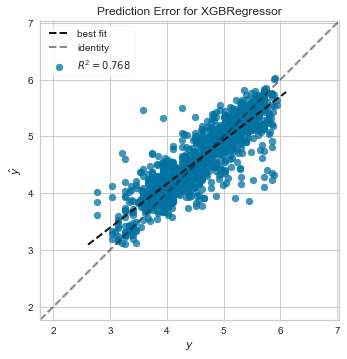

In [136]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
visualizer = PredictionError(xgboost)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()    

## EVALUATION

In [137]:
datas = {
    'Base LinReg': [MAE_lr,MSE_lr,RMSE_lr,R2_lr],
    'Ridge' : [MAE_ridge,MSE_rf,RMSE_ridge,R2_ridge],
    'Base RF' : [MAE_rf,MSE_rf,RMSE_rf,R2_rf],
    'Base XGB': [MAE_xgboost,MSE_xgboost,RMSE_xgboost,R2_xgboost]

}
pd.DataFrame(data=datas, index=['MAE','MSE','RMSE','R2']).T.sort_values(by='R2',ascending=False)

,MAE,MSE,RMSE,R2
Base RF,0.210709,0.099350,0.315199,0.779639
Base XGB,0.222442,0.104576,0.323382,0.768048
Base LinReg,0.326621,0.189155,0.434919,0.580452
Ridge,0.326748,0.099350,0.434935,0.580420


# TUNING

## RANDOM FOREST TUNING

### RANDOMSEARCHCV

In [144]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [145]:
RF = RandomForestRegressor()

In [146]:
param_RF = {'bootstrap': [True, False],
               'max_depth': [ None,10, 20, 30, 40],
               'max_features': ['auto', 20,30 ],
               'min_samples_leaf': [1, 2, 4, 30],
               'min_samples_split': [2, 5, 10, 20],
               'n_estimators': [100, 180,400]}

In [457]:
# RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
#                       max_depth=None, max_features='auto', max_leaf_nodes=None,
#                       max_samples=None, min_impurity_decrease=0.0,
#                       min_impurity_split=None, min_samples_leaf=1,
#                       min_samples_split=2, min_weight_fraction_leaf=0.0,
#                       n_estimators=100, n_jobs=None, oob_score=False,
#                       random_state=None, verbose=0, warm_start=False)

In [458]:
# param_RF = {'n_estimators': [100,2000,3000],
#             'max_depth': [None,5,8,10],
#             'min_samples_leaf'=[1,3,5]
#             'min_samples_split': [2,10,20],
#             'max_features': ['auto',5,10]
#            }

In [459]:
# param_RF = {"n_estimators" : [100, 200, 500, 1000],
#           "max_depth" : [None, 5, 7, 9, 20],
#           "min_samples_split" : [2, 9, 15, 25],
#           "min_samples_leaf" : [1, 2, 5, 10],
#           "max_features" : [None, .8, .7, .6]}



In [149]:
model_RF = GridSearchCV(estimator=RF, param_grid=param_RF, cv = 4, n_jobs=-1, verbose=1)

In [150]:
model_RF.fit(X_train, y_train)

Fitting 4 folds for each of 1440 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed: 25.0min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed: 43.7min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 53.1min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [151]:
model_RF.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 400}

In [463]:
# {'n_estimators': 2000,
#  'min_samples_split': 2,
#  'max_features': 10,
#  'max_depth': None}

In [152]:
model_rftuned = model_RF.best_estimator_

In [153]:
rftuned_predict = model_rftuned.predict(X_test)
rftuned_predict

array([5.08608031, 3.89145743, 4.18118231, ..., 5.1466156 , 4.01739063,
       5.14541663])

In [154]:
R2_rftuned = r2_score(y_test, rftuned_predict)
MAE_rftuned = mean_absolute_error(y_test, rftuned_predict)
MSE_rftuned = mean_squared_error(y_test, rftuned_predict)
RMSE_rftuned = np.sqrt(MSE_rftuned)

In [155]:
print(f"Training: {model_rftuned.score(X_train, y_train)}")
print(f"Testing: {R2_rftuned}")

Training: 0.9715367374702069
Testing: 0.7812438934245752


In [156]:
RFdata = pd.DataFrame({'Actual': np.expm1(y_test), 'Prediction': np.expm1(rftuned_predict)})
RFdata.head(10)

,Actual,Prediction
id,,
39612331,238.0,160.754590
39612598,39.0,47.982223
19799435,50.0,64.443181
823571,279.0,164.739879
19286135,135.0,140.403439
2095865,64.0,57.507926
26555143,228.0,196.316704
10467184,170.0,215.403577
30167617,99.0,78.711660


### BAYESIANOPTIMIZATION

In [142]:
# from bayes_opt import BayesianOptimization

In [151]:
# def rf_evaluate(max_depth, min_samples_split, min_samples_leaf, n_estimators):
#     model = RandomForestRegressor(max_depth=int(max_depth),
#                                   min_samples_split=int(min_samples_split),
#                                   min_samples_leaf=int(min_samples_leaf),
#                                   n_estimators=int(n_estimators)
#                                   )
#     cv_result = rmse_cv_train(model).mean()

#     return -cv_result

In [152]:
# rf_bo = BayesianOptimization(rf_evaluate, {'max_depth': (1, 30),
#                                            'min_samples_split': (2, 30),
#                                            'min_samples_leaf': (1, 60),
#                                         'n_estimators': (100, 2000)

In [153]:
# rf_bo.maximize(init_points=3, n_iter=15)

|   iter    |  target   | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------
|  1        | -0.445    |  3.441    |  2.125    |  22.58    |  122.3    |
|  2        | -0.3544   |  27.7     |  21.23    |  3.388    |  1.447e+0 |
|  3        | -0.3737   |  26.54    |  42.12    |  9.392    |  109.0    |
|  4        | -0.3504   |  29.23    |  18.28    |  2.746    |  1.449e+0 |
|  5        | -0.3099   |  30.0     |  1.0      |  2.0      |  1.491e+0 |
|  6        | -0.3097   |  30.0     |  1.0      |  2.0      |  1.551e+0 |
|  7        | -0.4469   |  3.556    |  57.81    |  28.11    |  1.555e+0 |
|  8        | -0.3097   |  30.0     |  1.0      |  2.0      |  1.617e+0 |
|  9        | -0.3098   |  30.0     |  1.0      |  2.0      |  1.684e+0 |
|  10       | -0.4446   |  3.663    |  9.014    |  21.53    |  1.757e+0 |
|  11       | -0.3782   |  30.0     |  50.6     |  2.0      |  1.659e+0 |
|  12       | -0.5155   |  1.0      | 

In [154]:
# rf_bo.max

{'target': -0.30969490722572146,
 'params': {'max_depth': 30.0,
  'min_samples_leaf': 1.0,
  'min_samples_split': 2.0,
  'n_estimators': 1616.811647288469}}

In [653]:
RF_TUNED = RandomForestRegressor(max_depth=20,
                                 min_samples_split=2,
                                 min_samples_leaf=1,
                                 n_estimators=180,
                                 max_features=20,
                                 bootstrap=False,

                                 )

In [654]:
RF_TUNED.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features=20, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=180, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [655]:
RF_TUNED_PREDICT = RF_TUNED.predict(X_test)

In [658]:
print('MAE:', mean_absolute_error(y_test, RF_TUNED_PREDICT))
print('MSE:', mean_squared_error(y_test, RF_TUNED_PREDICT))
print('RMSE:', np.sqrt(mean_squared_error(y_test, RF_TUNED_PREDICT)))
print('R2 score:', r2_score(y_test, RF_TUNED_PREDICT))
# print("RMSE on Training set :", rmse_cv_train(rf).mean())
# print("RMSE on Test set :", rmse_cv_test(rf).mean())
RF_TUNED_PREDICT = RF_TUNED.predict(X_test)

MAE: 0.20182682858437728
MSE: 0.0929538416446376
RMSE: 0.3048833246418006
R2 score: 0.7938266490802055


In [659]:
rfcoba.score(X_train,y_train)

0.9365934029693693

## XGB

### XGB RANDOMIZEDSEARCH CV

In [157]:
XGB_Tuned = XGBRegressor()


In [ ]:
# XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
#              importance_type='gain', interaction_constraints='',
#              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
#              min_child_weight=1, missing=nan, monotone_constraints='()',
#              n_estimators=100, n_jobs=0, num_parallel_tree=1,
#              objective='reg:squarederror', random_state=0, reg_alpha=0,
#              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
#              validate_parameters=1, verbosity=None)

In [638]:
# param_xgb = {'max_depth': [None, 1, 10],
#              'learning_rate': [0.300000012,0.600000012] , 
#              'n_estimators': [1000,2000], 
#              'gamma': [0,.5,1], 
#              'colsample_bytree': [1,0.5],
#              'subsample': [1,0.5], 
#              'reg_alpha':[0,0.5,0.8] ,
#              'reg_lambda': [1,0.8,1.2],
#             }

In [158]:
param_xgb = {"learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
             "max_depth": [3, 4, 5, 6, 8, 10, 12, 15],
             "min_child_weight": [1, 3, 5, 7],
             "gamma": [0.0, 0.1, 0.2, 0.3, 0.4],
             "colsample_bytree": [0.3, 0.4, 0.5, 0.7]}

In [159]:
model_Tuned_XGB = RandomizedSearchCV(estimator=XGB_Tuned, param_distributions=param_xgb, cv= 4, n_jobs= -1, verbose= 1)
model_Tuned_XGB.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    6.9s finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                                          verbosity=None),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0

In [162]:
model_Tuned_XGB.best_params_

{'min_child_weight': 3,
 'max_depth': 15,
 'learning_rate': 0.15,
 'gamma': 0.1,
 'colsample_bytree': 0.5}

In [163]:
model_tuned_XGB = model_Tuned_XGB.best_estimator_
y_tuned_xgb = model_tuned_XGB.predict(X_test)
R2_tuned_XGB = r2_score(y_test, y_tuned_xgb)
print(f"Training: {xgboost.score(X_train, y_train)}")
print("Testing:", r2_score(y_test, y_tuned_xgb))
MAE_Tuned_XGB = mean_absolute_error(y_test, y_tuned_xgb)
MSE_Tuned_XGB = mean_squared_error(y_test, y_tuned_xgb)
RMSE_Tuned_XGB = np.sqrt(MSE_Tuned_XGB)

Training: 0.9309181335369094
Testing: 0.7759751352123185


### XGB BO

In [497]:
# dtrain = xgb.DMatrix(X_train, label=y_train)

In [498]:
# dtest = xgb.DMatrix(X_test)

In [174]:
# def xgb_evaluate(max_depth, gamma, colsample_bytree, learning_rate,min_child_weight,n_estimators):
#     params = {'eval_metric': 'rmse',
#               'max_depth': int(max_depth),
#               'subsample': 0.8,
#               'eta': 0.1,
#               'gamma': gamma,
#               'learning_rate': learning_rate,
#               'colsample_bytree': colsample_bytree,
#               'min_child_weight': min_child_weight,
#               'n_estimators': n_estimators}
#     # Used around 1000 boosting rounds in the full model
#     cv_result = xgb.cv(params, dtrain, num_boost_round=100, nfold=3)    
    
#     # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
#     return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

In [175]:
# xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 7), 
#                                              'gamma': (0, 1),
#                                              'learning_rate':(0.01,0.08),
#                                              'colsample_bytree': (0.3, 0.9),
#                                             'min_child_weight':(0,2),
#                                             'n_estimators':(100,3000)})

In [140]:
# print('MAE:', metrics.mean_absolute_error(y_test, prediction_XGB))
# print('MSE:', metrics.mean_squared_error(y_test, prediction_XGB))
# print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_XGB)))
# print('R2 score:', metrics.r2_score(y_test, prediction_XGB))

MAE: 0.21885429676736604
MSE: 0.09779368868331742
RMSE: 0.3127198245767566
R2 score: 0.7830917782642297


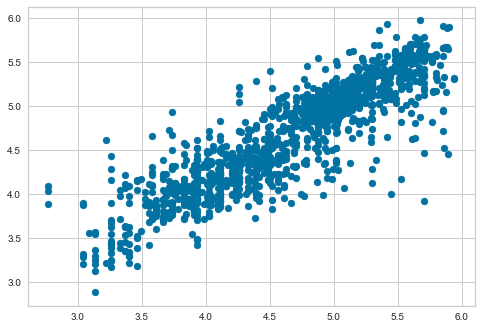

In [141]:
# plt.scatter(y_test, prediction_XGB)

# COMBINED EVA

In [164]:
datas = {
    'Base LinReg': [MAE_lr,MSE_lr,RMSE_lr,R2_lr],
    'Base RF' : [MAE_rf,MSE_rf,RMSE_rf,R2_rf],
    'Base XGB': [MAE_xgboost,MSE_xgboost,RMSE_xgboost,R2_xgboost],
    'Ridge Reg':[MAE_ridge,MSE_rf,RMSE_ridge,R2_ridge],
    'RF TUNED': [MAE_rftuned,MSE_rftuned,RMSE_rftuned,R2_rftuned],
    'XGB TUNED': [MAE_Tuned_XGB,MSE_Tuned_XGB,RMSE_Tuned_XGB,R2_tuned_XGB]

}
pd.DataFrame(data=datas, index=['MAE','MSE','RMSE','R2']).T.sort_values(by='R2',ascending=False)

,MAE,MSE,RMSE,R2
RF TUNED,0.207373,0.098627,0.314049,0.781244
Base RF,0.210709,0.099350,0.315199,0.779639
XGB TUNED,0.217818,0.101002,0.317809,0.775975
Base XGB,0.222442,0.104576,0.323382,0.768048
Base LinReg,0.326621,0.189155,0.434919,0.580452
Ridge Reg,0.326748,0.099350,0.434935,0.580420


# BEST MODEL

In [ ]:
{'bootstrap': False,
 'max_depth': 20,
 'max_features': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 400}

In [192]:
RF_TUNED = RandomForestRegressor(max_depth=20,
                                 min_samples_split=5,
                                 min_samples_leaf=2,
                                 n_estimators=350,
                                 max_features=10,
                                 bootstrap=False,

                                 )

In [193]:
RF_TUNED.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=350, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [194]:
RF_TUNED_PREDICT = RF_TUNED.predict(X_test)

In [197]:
R2_rftuned = r2_score(y_test, RF_TUNED_PREDICT)
MAE_rftuned = mean_absolute_error(y_test, RF_TUNED_PREDICT)
MSE_rftuned = mean_squared_error(y_test, RF_TUNED_PREDICT)
RMSE_rftuned = np.sqrt(MSE_rftuned)
print(f"Training: {RF_TUNED.score(X_train, y_train)}")
print(f"Testing: {R2_rftuned}")

Training: 0.9606484426019994
Testing: 0.7884088113908742


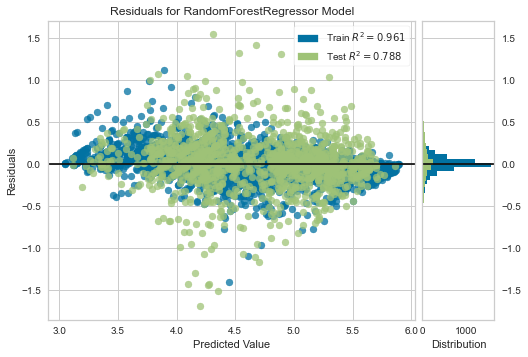

In [198]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

# Load a regression dataset
train, target = load_concrete()


# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(RF_TUNED)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

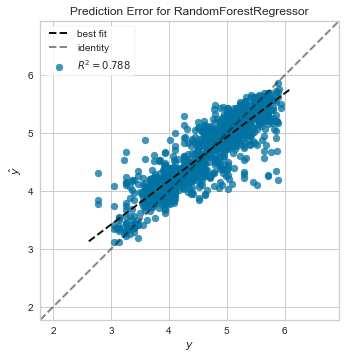

In [200]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
visualizer = PredictionError(RF_TUNED)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()    

# CONCLUSION

Dari perbandingan 4 algoritma, saya melakukan hyperparameter tuning untuk dua algoritma terbaik yaitu RandomforestRegressor dan  XGBRegressor. Setelah tuning, RF_TUNED memiliki score tertinggi dan error terendah.

# DEPLOYMENT

In [201]:
import joblib

In [202]:
joblib.dump(RF_TUNED,'SINAirbnb_MODEL2')

['SINAirbnb_MODEL2']

# REFERENCES

- https://towardsdatascience.com/a-conceptual-explanation-of-bayesian-model-based-hyperparameter-optimization-for-machine-learning-b8172278050f
- **BAYESIAN** : 
    - https://github.com/fmfn/BayesianOptimization
    - https://www.kaggle.com/willkoehrsen/automated-model-tuning
    
    https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/

- https://medium.com/@ODSC/optimizing-hyperparameters-for-random-forest-algorithms-in-scikit-learn-d60b7aa07ead